In [1]:
from __future__ import print_function

import sys
import os

#sys.path.append('UrbanCNN/');
#sys.path.append('srimmele/');
#sys.path.append('ecbm4040/');
import tensorflow as tf

from matplotlib.pyplot import imshow, plot, title, subplots


from srimmele.data_utils import getCityImages
from UrbanCNN.utils import generator_from_file
import numpy as np

# these magics ensure that external modules that are modified are also automatically reloaded
%load_ext autoreload
%autoreload 2
%matplotlib inline


In [2]:
city = 'berlin, de'
if not os.path.exists('imagery/' + city):
    getCityImages(city)
else:
    print ('Image files already extracted')

Image files already extracted


[Image augmentation in original paper](https://github.com/adrianalbert/urban-environments/blob/master/land-use-classification/Finetuning%20on%20Urban%20Atlas%20data.ipynb)

In [3]:
all_classes = '''Agricultural + Semi-natural areas + Wetlands
Airports
Construction sites
Continuous Urban Fabric (S.L. > 80%)
Discontinuous Dense Urban Fabric (S.L. : 50% -  80%)
Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)
Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)
Discontinuous Very Low Density Urban Fabric (S.L. < 10%)
Fast transit roads and associated land
Forests
Green urban areas
Industrial, commercial, public, military and private units
Isolated Structures
Land without current use
Mineral extraction and dump sites
Other roads and associated land
Port areas
Railways and associated land
Sports and leisure facilities
Water bodies'''.split("\n")

classes = all_classes
print(len(classes))

class2label = {c:i for i,c in enumerate(classes)}
label2class = {i:c for i,c in enumerate(classes)}
class_weights = {c:1 for c in label2class.keys()}

20


In [ ]:
from keras.preprocessing.image import ImageDataGenerator


#this is the augmentation configuration the author's use for training
train_augmenter = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.10,
        zoom_range=[1,1.2],
        vertical_flip=True,
        rotation_range=15,
        horizontal_flip=True)

test_augmenter = ImageDataGenerator(rescale=1./255)

In [61]:
train_generator      = generator_from_file('data/train.csv', image_generator= None, balance=1, \
                            batch_size = 100, seed=26, new_img_shape= (112,112), \
                            class_dict=None, shuffle=True, channels="RGB",
                            downsample=True, crop= 60, batch_type = 'training', one_hot = False)
# validation was 112 for successful runs
validation_generator = generator_from_file('data/train.csv', image_generator= None, balance=1, \
                        batch_size = 100, seed=26, new_img_shape= (112,112), \
                        class_dict=None, shuffle=True, channels="RGB",
                        downsample=False, crop = 60, batch_type = 'validation', one_hot = False)


19601 total records


/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


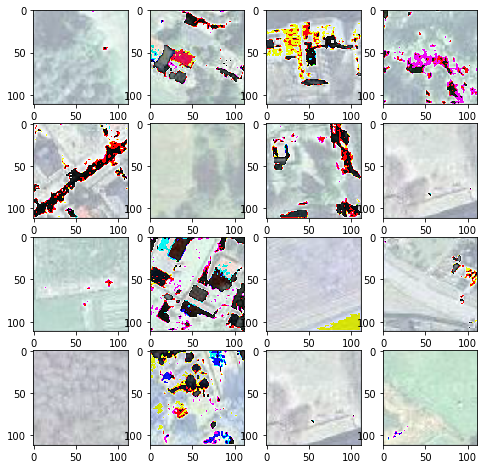

In [63]:
from numpy import random

r = 4
f, axarr = subplots(r, r, figsize=(8,8))
test = next(train_generator)

for i in range(r):
    for j in range(r):

        img = test[0][random.randint(0,50),:,:,:] 
        axarr[i][j].imshow(img)
        #title(label2class[test[1][0]])


/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


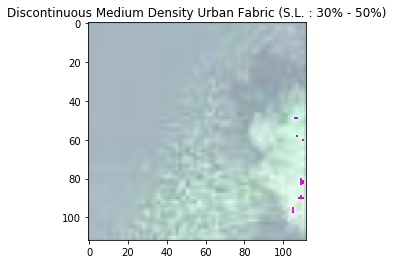

In [64]:
## construction sites are largely inaccurate

test = next(train_generator)
image =imshow(test[0][0,:,:,:])
test[1][0]
title(label2class[test[1][0]])


2827 total records


/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


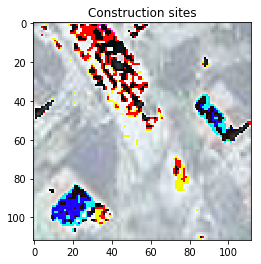

In [65]:
test = next(validation_generator)
image =imshow(test[0][1,:,:,:])
title(label2class[test[1][1]])


In [66]:
conv_feat_dict = {}

conv_feat_dict[0] = [64 , 64]
conv_feat_dict[1] = [128 , 128]
conv_feat_dict[2] = [256 ,256, 256]
conv_feat_dict[3] = [512 , 512, 512]
conv_feat_dict[4] = [512 , 512, 512]

conv_kernel_dict = dict(keys = conv_feat_dict.keys())

conv_kernel_dict[0] = [2] * 2
conv_kernel_dict[1] = [2] * 2
conv_kernel_dict[2] = [2] * 3
conv_kernel_dict[3] = [2] * 3
conv_kernel_dict[4] = [2] * 3

pooling_size_dict = dict(keys = conv_feat_dict.keys())

pooling_size_dict[0] = [2] * 2
pooling_size_dict[1] = [2] * 2
pooling_size_dict[2] = [2] * 3
pooling_size_dict[3] = [2] * 3 
pooling_size_dict[4] = [2] * 3

fc_units = [4096, 4096]


In [ ]:
from srimmele.classifiers import training

tf.reset_default_graph()

training(train_generator, validation_generator,
             conv_feat_dict = conv_feat_dict,
             fc_units = fc_units,
             conv_kernel_dict = conv_kernel_dict,
             pooling_size_dict = pooling_size_dict,
             img_size = 112,
             l2_norm=5e-2,
             seed=27,
             batch_size = 20,
             learning_rate= 0.1,
             lr_decay = 2.0,
             epoch=20,
             samples_per_epoch = 2000,
             verbose=False,
             pre_trained_model=None)

epoch 1 


/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


Best validation accuracy! iteration:10 accuracy: 20.0%
Best validation accuracy! iteration:40 accuracy: 23.0%
Best validation accuracy! iteration:70 accuracy: 28.0%
Best validation accuracy! iteration:80 accuracy: 29.0%
epoch 2 
Best validation accuracy! iteration:120 accuracy: 30.0%


In [48]:
from srimmele.classifiers import training

tf.reset_default_graph()

training(train_generator, validation_generator,
             conv_feat_dict = conv_feat_dict,
             fc_units = fc_units,
             conv_kernel_dict = conv_kernel_dict,
             pooling_size_dict = pooling_size_dict,
             img_size = 224,
             l2_norm=0.0,
             seed=27,
             batch_size = 10,
             learning_rate= 0.025,
             lr_decay = 2.0,
             epoch=10,
             samples_per_epoch = 2000,
             verbose=False,
             pre_trained_model= 'VGG16_1513357523')

Load the model from: VGG16_1513357523
INFO:tensorflow:Restoring parameters from model/VGG16_1513357523


KeyboardInterrupt: 

## DO

* add accuracy to tensorboard variables
* ~change padding back to SAME~
* train new model on 112/122 data?
* do madrid
* back to AdaDelta?



VGG16_1513200379
VGG16_1513200871 

Share with TAs : VGG16_1513203220


## VGG16_1513313819,  94%
* 80 epochs
* 0 norm
* 0.1 learning rate
* kernel 2 


## VGG16_1513296320
* batch size 50
* 40 epochs
* kernel size 2



# Wrong validation dims

## Best: VGG16_1513216839, 90% val
* batch size 50
* 40 epochs
* kernel size 2

## Best: VGG16_1513212753 , 64% val
* batch size 50
* 50 epochs
* kernel size 1

## Notes:

Keras Convolution2d defaults:
* padding = 'valid' , but author adds 0padding layer to compensate. 
* bias initialized to 0
* glorot uniform kernel init

VGG16 pretrain: 
http://www.cs.toronto.edu/~frossard/post/vgg16/

see here for weights and code


### Attempted parameter tuning
* learning rate vary from .1 (paper) down to 1e-4 (original VGG16)
* LR Decay from 2-10
* Penalty from 0 to 5e-2 (original VGG)
* Kernel size 2 and 3
* batch size 50-100 , 100 (paper batch count) maxes out memory
* Crop image following paper specs vs. original image.
* Adadelta and Adam optimizers



/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


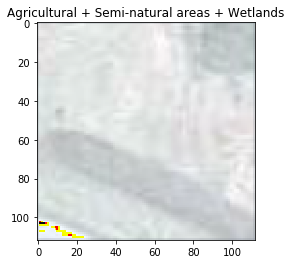

In [78]:
test_generator = generator_from_file('data/test.csv', image_generator= None, balance=False, \
                        batch_size = 150, seed=26, new_img_shape= (112,112), \
                        class_dict=None, shuffle=True, channels="RGB",
                        downsample=False, crop = 60, batch_type = None, one_hot = False)

test_set = next(test_generator)

image =imshow(test_set[0][1,:,:,:])
title(label2class[test_set[1][1]])

In [79]:
### Testing code 
tf.reset_default_graph()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('model/VGG16_1513372264.meta')
    saver.restore(sess, tf.train.latest_checkpoint('model/'))

    graph = tf.get_default_graph()
    
    tf_input = graph.get_operations()[0].name+":0"
    x = graph.get_tensor_by_name(tf_input)
    print(x)
    
    tf_output = "fc_layer_2/Add:0"
    y = graph.get_tensor_by_name(tf_output)
    print(y)
    
    for i in range(10):
        test_set = next(test_generator)
        X_test =  test_set[0]


        prediction=tf.argmax(y,1)
        y_out = prediction.eval(feed_dict={x: X_test  })

        print((y_out == test_set[1]).mean())

INFO:tensorflow:Restoring parameters from model/VGG16_1513372264
Tensor("inputs/Placeholder:0", shape=(?, 112, 112, 3), dtype=float32)
Tensor("fc_layer_2/Add:0", shape=(?, 10), dtype=float32)


/home/ecbm4040/miniconda2/envs/dlenv/lib/python3.5/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


0.24
0.233333333333
0.253333333333
0.253333333333
0.273333333333
0.193333333333
0.246666666667
0.253333333333
0.286666666667
0.193333333333


In [76]:
[label2class[i] for i in y_out]

['Discontinuous Dense Urban Fabric (S.L. : 50% -  80%)',
 'Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)',
 'Airports',
 'Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)',
 'Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)',
 'Airports',
 'Agricultural + Semi-natural areas + Wetlands',
 'Airports',
 'Agricultural + Semi-natural areas + Wetlands',
 'Agricultural + Semi-natural areas + Wetlands',
 'Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)',
 'Discontinuous Dense Urban Fabric (S.L. : 50% -  80%)',
 'Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)',
 'Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)',
 'Discontinuous Very Low Density Urban Fabric (S.L. < 10%)',
 'Agricultural + Semi-natural areas + Wetlands',
 'Discontinuous Dense Urban Fabric (S.L. : 50% -  80%)',
 'Discontinuous Very Low Density Urban Fabric (S.L. < 10%)',
 'Discontinuous Dense Urban Fabric (S.L. : 50% -  80%)',
 'Agricultural + Semi-nat

In [77]:
[label2class[i] for i in test_set[1]]

['Continuous Urban Fabric (S.L. > 80%)',
 'Continuous Urban Fabric (S.L. > 80%)',
 'Airports',
 'Continuous Urban Fabric (S.L. > 80%)',
 'Discontinuous Very Low Density Urban Fabric (S.L. < 10%)',
 'Agricultural + Semi-natural areas + Wetlands',
 'Agricultural + Semi-natural areas + Wetlands',
 'Airports',
 'Construction sites',
 'Forests',
 'Agricultural + Semi-natural areas + Wetlands',
 'Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)',
 'Discontinuous Very Low Density Urban Fabric (S.L. < 10%)',
 'Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)',
 'Fast transit roads and associated land',
 'Continuous Urban Fabric (S.L. > 80%)',
 'Discontinuous Low Density Urban Fabric (S.L. : 10% - 30%)',
 'Discontinuous Very Low Density Urban Fabric (S.L. < 10%)',
 'Construction sites',
 'Forests',
 'Agricultural + Semi-natural areas + Wetlands',
 'Discontinuous Very Low Density Urban Fabric (S.L. < 10%)',
 'Discontinuous Medium Density Urban Fabric (S.L. : 30% - 50%)',
 'Disc